In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import time

In [3]:
RANDOM_STATE = 15
# sys.stdout = open('report.log', 'w')

In [4]:
from models.adaboost import AdaBoost

In [5]:
from models.decisiontree import DecisionTree


In [6]:
def run_adaboost(dataset_name, dataset, K=None, random_state=None):
	if K is None:
		K = [5, 10, 15, 20]
	X_train, X_test, y_train, y_test = dataset
	for k in K:
		model = AdaBoost(n_estimators=k, base_estimator=DecisionTree(max_depth=1))
		st_time = time.time()
		model.fit(X_train, y_train, random_state=random_state)
		en_time = time.time()
		print(dataset_name, ' AdaBoost x', k, ' Train:', '{:.4f}'.format(model.score(X_train, y_train)),
		      ' Test:', '{:.4f}'.format(model.score(X_test, y_test)))
		model.plot_cm(X_test, y_test)
		print('elaspled time: ', '{:.4f}'.format(en_time - st_time))
	print(flush=True)


def run_decisionTree(dataset_name, dataset, random_state=None):
	X_train, X_test, y_train, y_test = dataset
	model = DecisionTree()
	st_time = time.time()
	model.fit(X_train, y_train, random_state=random_state)
	en_time = time.time()
	print(dataset_name, ' Decision Tree', ' Train:', '{:.4f}'.format(model.score(X_train, y_train)),
	      ' Test:', '{:.4f}'.format(model.score(X_test, y_test)))
	print('Train:\n' + model.report(X_train, y_train))
	print('Test:\n' + model.report(X_test, y_test))
	model.plot_cm(X_test, y_test)
	print('elaspled time: ', '{:.4f}'.format(en_time - st_time))
	print(flush=True)


In [7]:
from telco import train_test_dataset_telco
from adult import train_test_dataset_adult
from credit import train_test_dataset_credit

In [8]:
datasets = dict()
datasets['telco'] = train_test_dataset_telco(project_root='../', random_state=RANDOM_STATE)
datasets['adult'] = train_test_dataset_adult(project_root='../', random_state=RANDOM_STATE)
datasets['crdit'] = train_test_dataset_credit(project_root='../', random_state=RANDOM_STATE)

telco  Decision Tree  Train: 0.9979  Test: 0.7388
Train:
True Positive Rate: 1.00
True Negative Rate: 1.00
Precision: 1.00
False Discovery Rate: 0.00
F1 Score: 1.00

Test:
True Positive Rate: 0.51
True Negative Rate: 0.83
Precision: 0.52
False Discovery Rate: 0.48
F1 Score: 0.52

elaspled time:  3.6318

fitting 5 models
telco  AdaBoost x 5  Train: 0.7843  Test: 0.7757
elaspled time:  2.1933
fitting 10 models
telco  AdaBoost x 10  Train: 0.7851  Test: 0.7857
elaspled time:  3.7198
fitting 15 models
telco  AdaBoost x 15  Train: 0.7918  Test: 0.7906
elaspled time:  5.3715
fitting 20 models
telco  AdaBoost x 20  Train: 0.7964  Test: 0.7949
elaspled time:  8.4493

adult  Decision Tree  Train: 1.0000  Test: 0.8184
Train:
True Positive Rate: 1.00
True Negative Rate: 1.00
Precision: 1.00
False Discovery Rate: 0.00
F1 Score: 1.00

Test:
True Positive Rate: 0.62
True Negative Rate: 0.88
Precision: 0.61
False Discovery Rate: 0.39
F1 Score: 0.62

elaspled time:  40.8585

fitting 5 models
adult  Ad

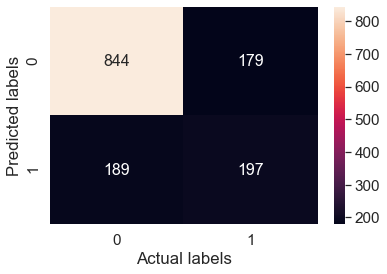

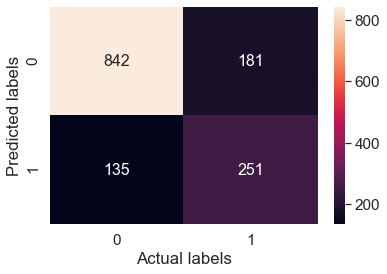

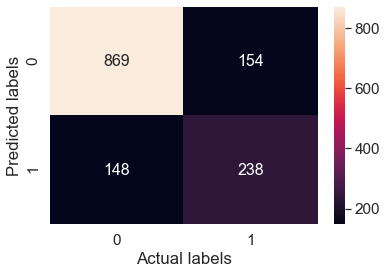

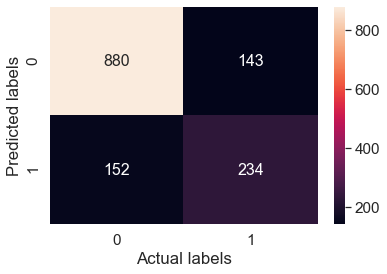

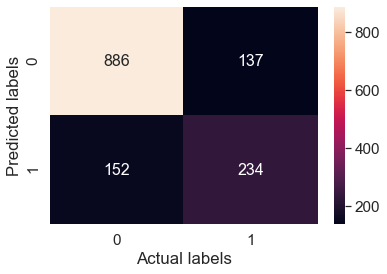

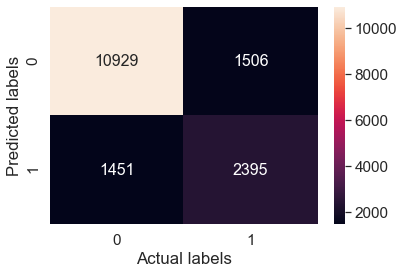

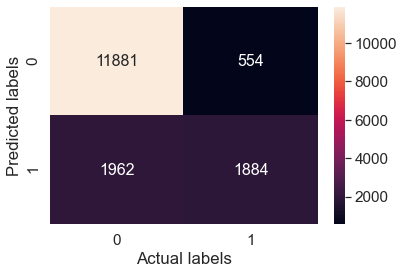

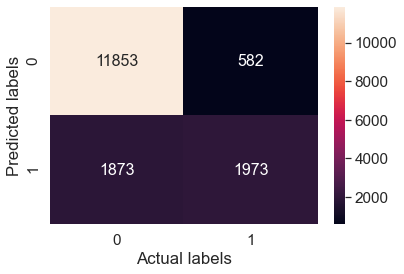

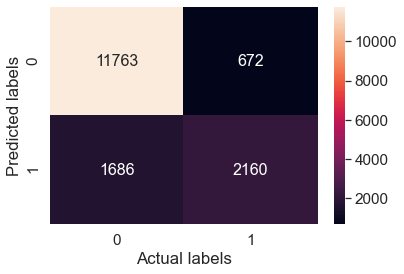

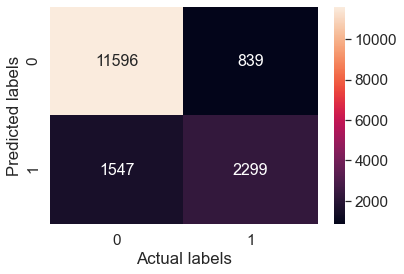

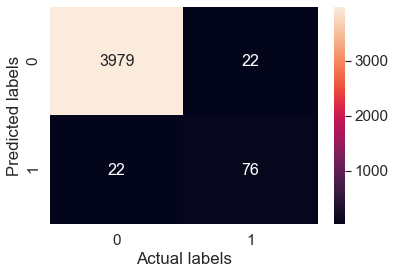

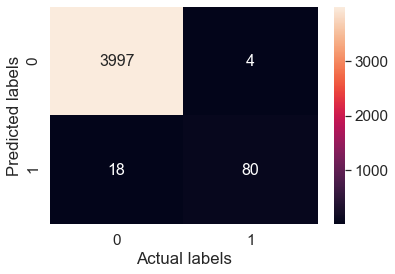

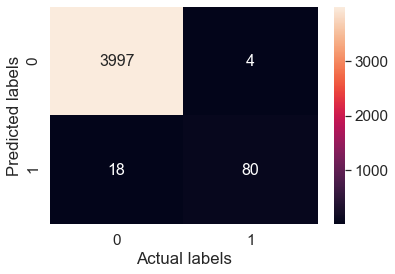

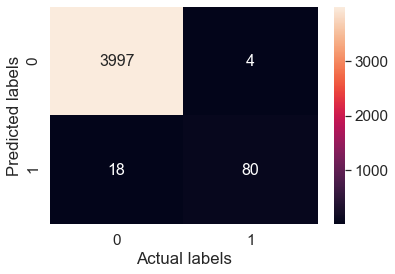

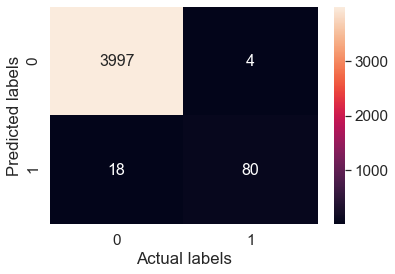

In [9]:
for (k, v) in datasets.items():
	run_decisionTree(k, v, random_state=RANDOM_STATE)

	run_adaboost(k, v, random_state=RANDOM_STATE)